In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [3]:
df = pd.read_csv("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", sep='\t', names=['word', 'emotion', 'association'])

In [4]:
df.head()

word       emotion  association
0  aback         anger            0
1  aback  anticipation            0
2  aback       disgust            0
3  aback          fear            0
4  aback           joy            0

In [5]:
# Filter only associated emotions (where association == 1)
df = df[df['association'] == 1]

In [6]:
# Count how many times each emotion appears
emotion_counts = df['emotion'].value_counts().sort_values(ascending=False)

In [11]:
# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

C:\Users\sarab\AppData\Local\Temp\ipykernel_5856\2302272313.py:13: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  plt.tight_layout()
C:\Users\sarab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


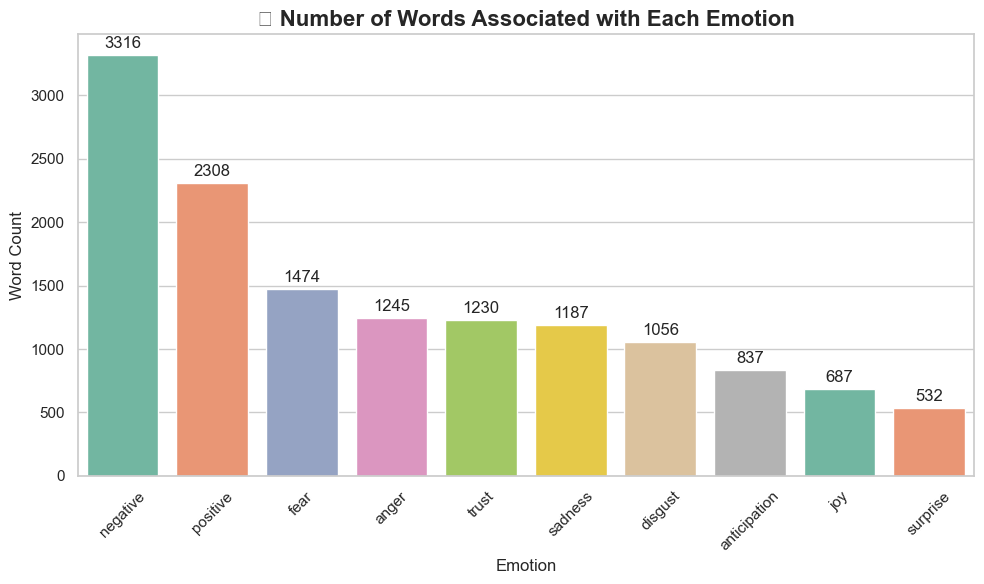

In [12]:
# Bar plot: Number of words per emotion
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=df['emotion'].value_counts().index, 
    y=df['emotion'].value_counts().values, 
    palette='Set2'
)
ax.bar_label(ax.containers[0], label_type='edge', padding=3)
plt.title('Number of Words Associated with Each Emotion', fontsize=16, fontweight='bold')
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\sarab\AppData\Local\Temp\ipykernel_5856\1586436826.py:10: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from current font.
  plt.tight_layout()
C:\Users\sarab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


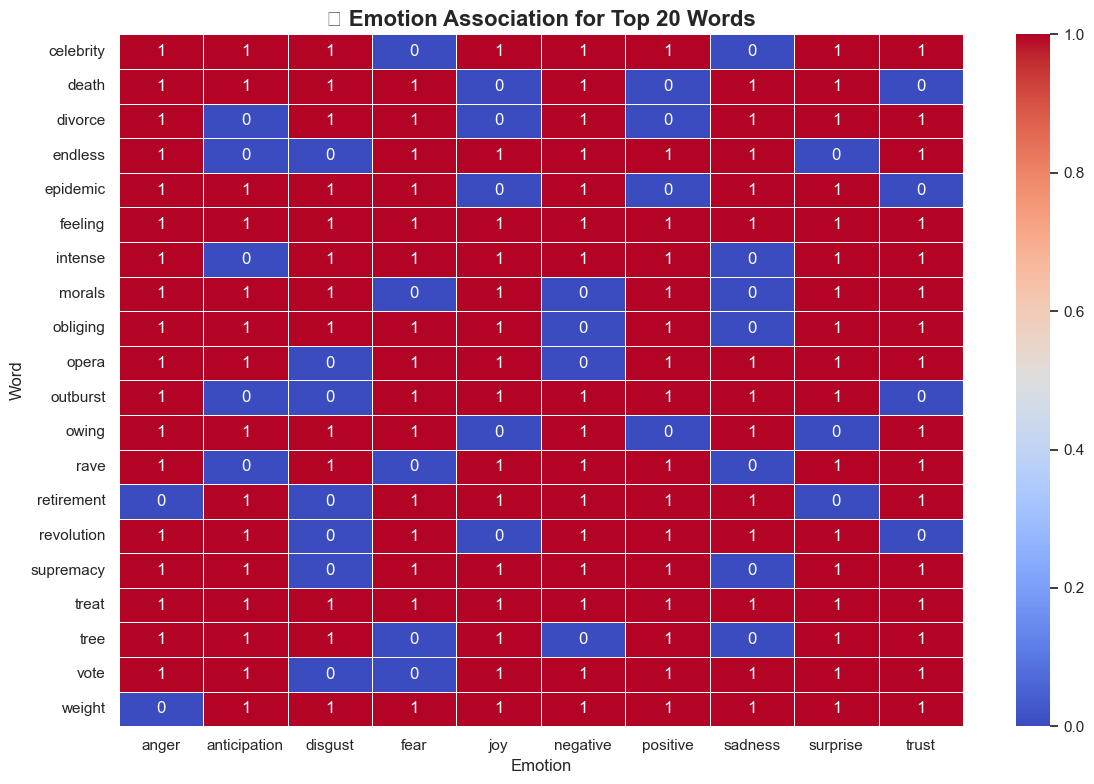

In [13]:
# Heatmap of top 20 words vs emotions
top_words = df['word'].value_counts().head(20).index
pivot = df[df['word'].isin(top_words)].pivot_table(index='word', columns='emotion', values='association', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='coolwarm', annot=True, linewidths=0.5)
plt.title('Emotion Association for Top 20 Words', fontsize=16, fontweight='bold')
plt.xlabel('Emotion')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

C:\Users\sarab\AppData\Local\Temp\ipykernel_5856\2294894043.py:9: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from current font.
  plt.tight_layout()
C:\Users\sarab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


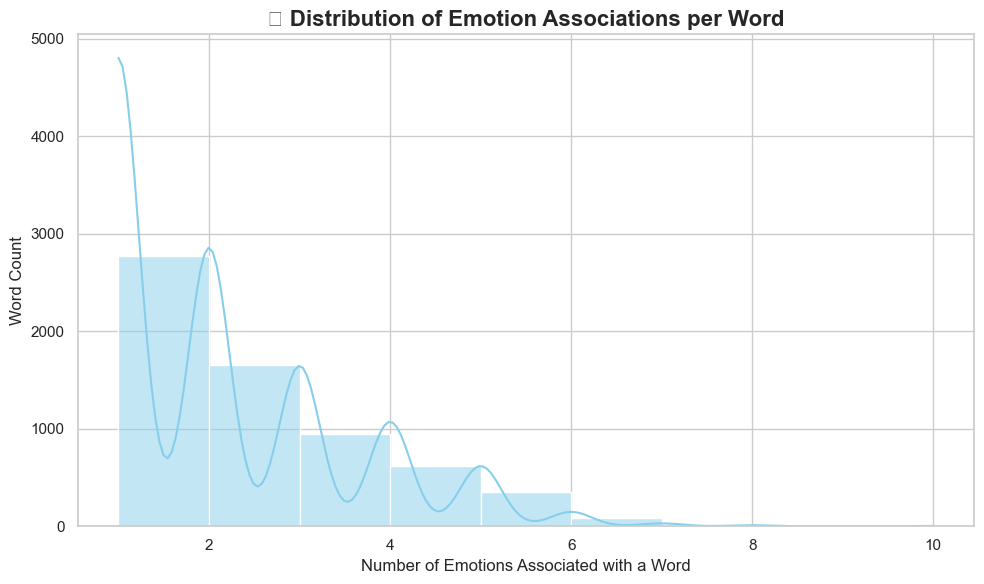

In [14]:
# Count of emotions per word (distribution)
word_emotion_count = df.groupby('word')['emotion'].count()

plt.figure(figsize=(10, 6))
sns.histplot(word_emotion_count, bins=range(1, 11), kde=True, color='skyblue')
plt.title('Distribution of Emotion Associations per Word', fontsize=16, fontweight='bold')
plt.xlabel('Number of Emotions Associated with a Word')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()

C:\Users\sarab\AppData\Local\Temp\ipykernel_5856\383843078.py:8: UserWarning: Glyph 128280 (\N{RADIO BUTTON}) missing from current font.
  plt.tight_layout()
C:\Users\sarab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128280 (\N{RADIO BUTTON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


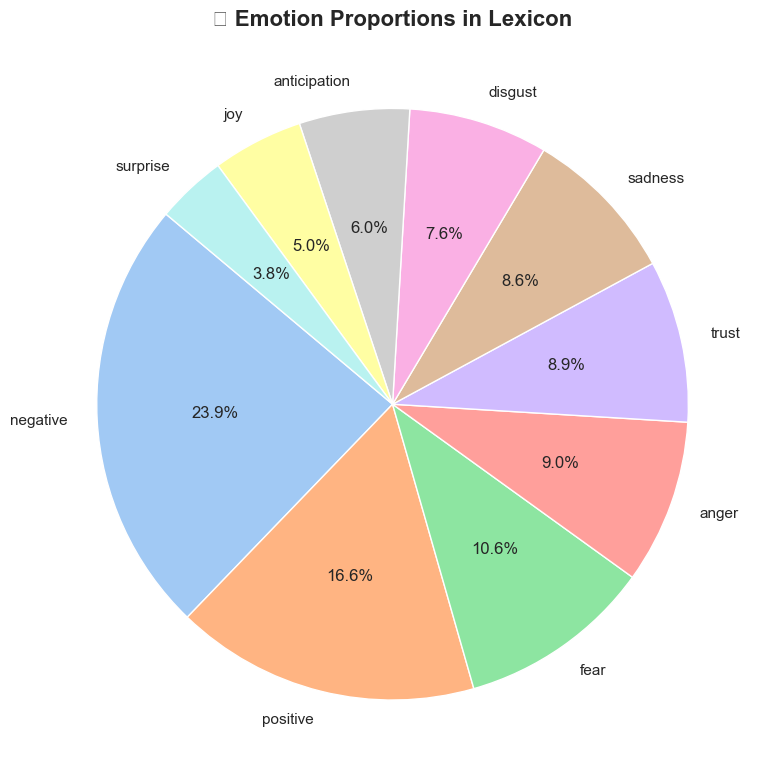

In [15]:
# Pie Chart – Proportion of Emotion Categories
emotion_counts = df['emotion'].value_counts()
colors = sns.color_palette('pastel')[0:len(emotion_counts)]

plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Emotion Proportions in Lexicon', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\sarab\AppData\Local\Temp\ipykernel_5856\1216928509.py:18: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from current font.
  plt.tight_layout()
C:\Users\sarab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


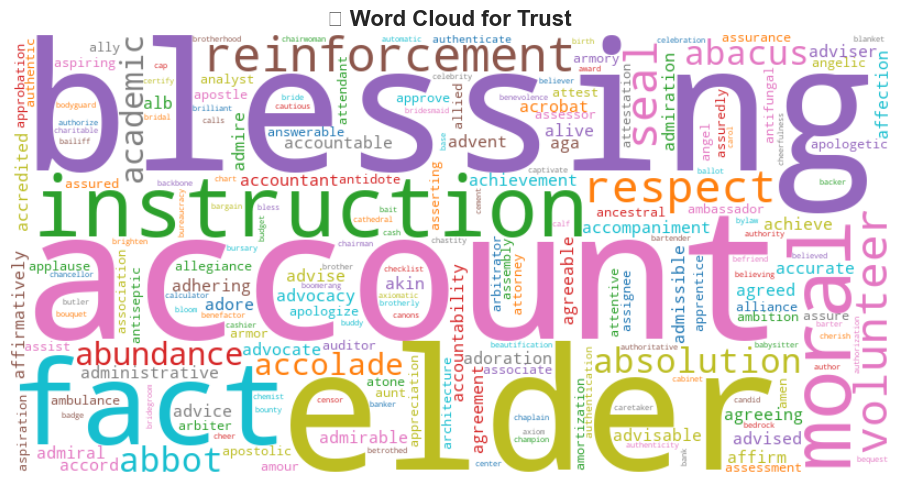

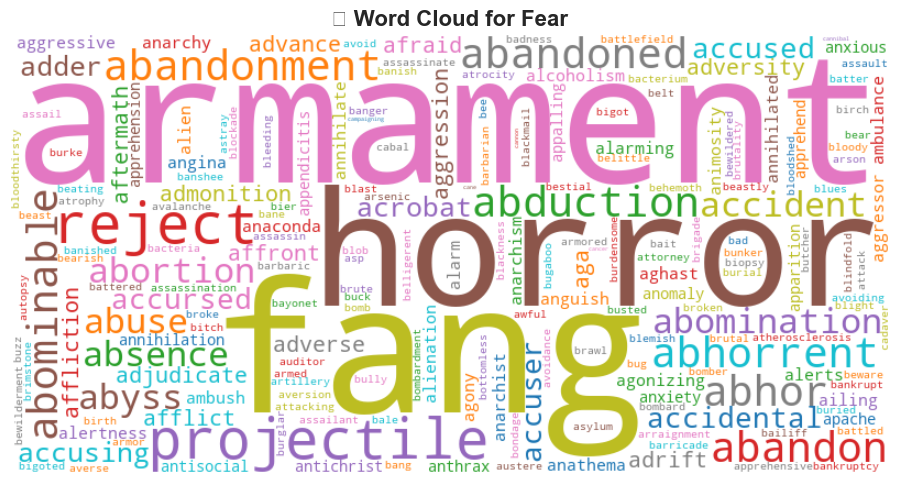

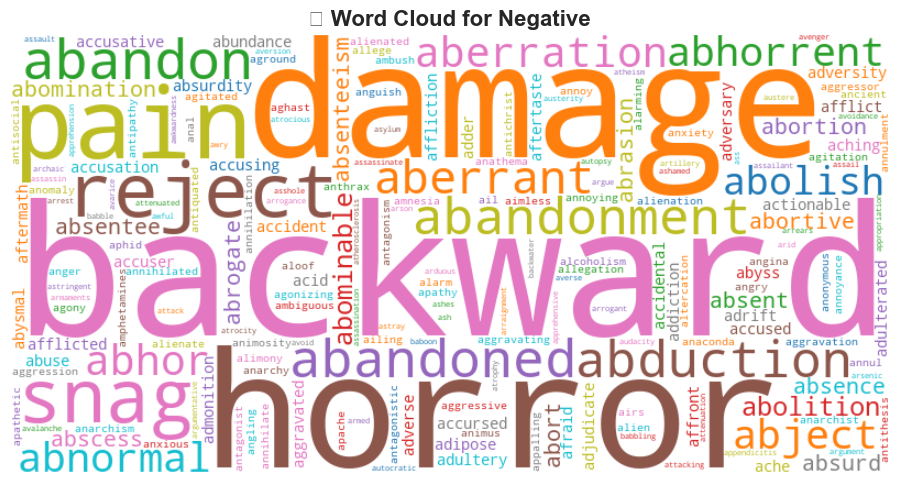

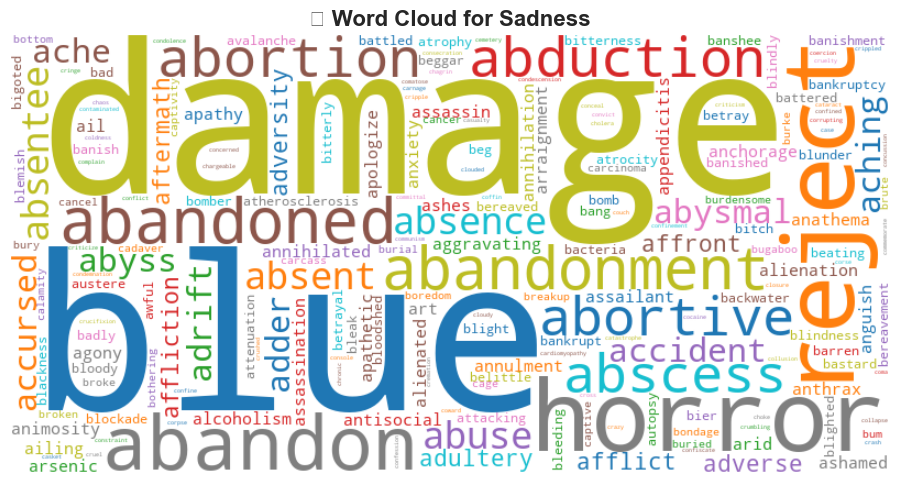

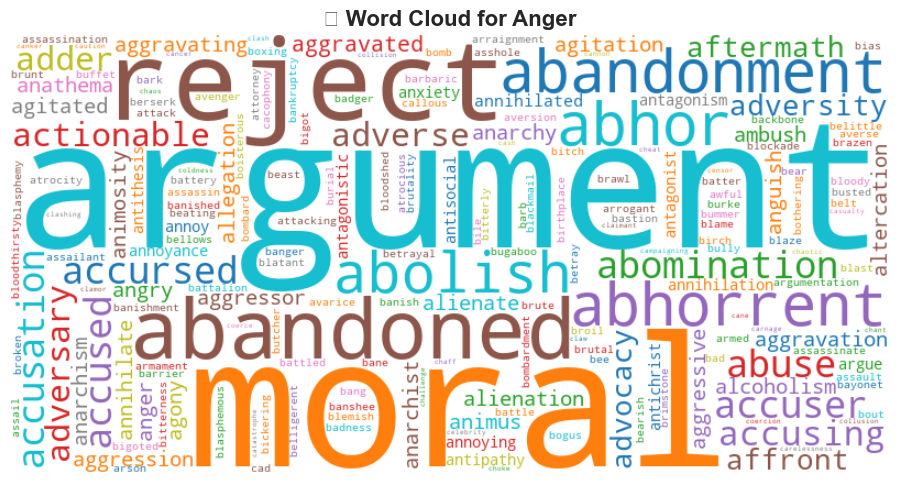

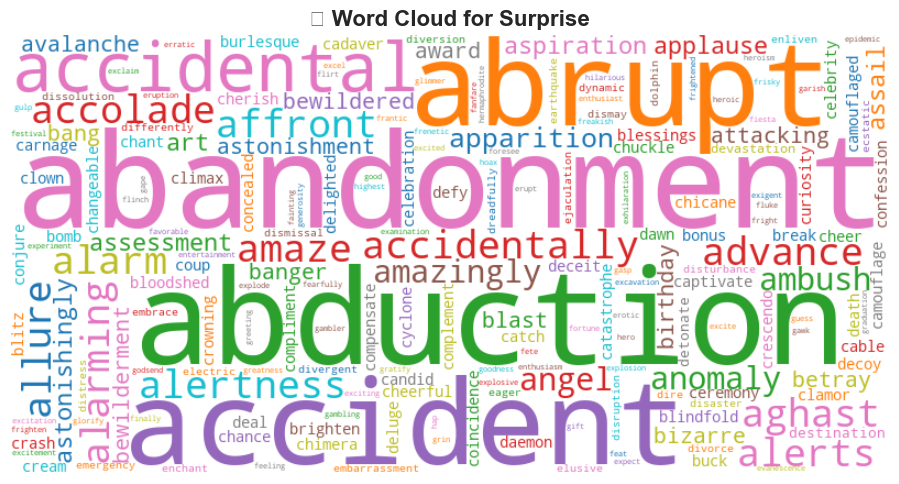

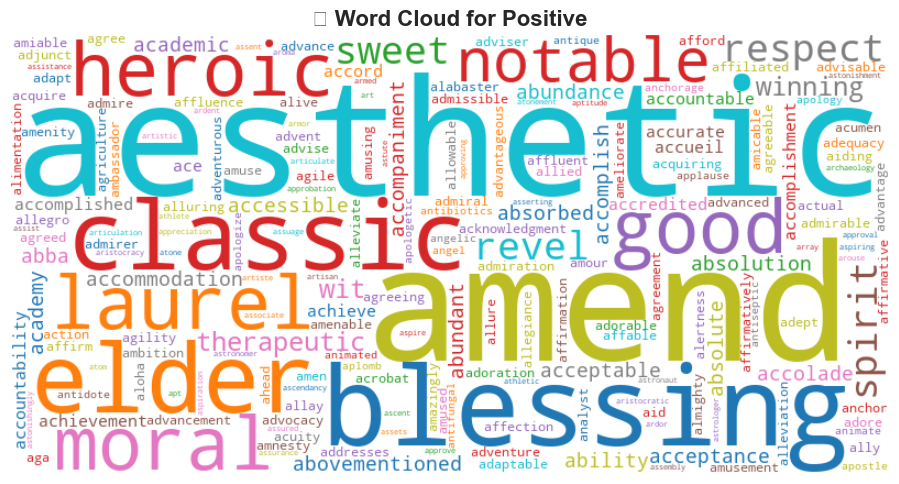

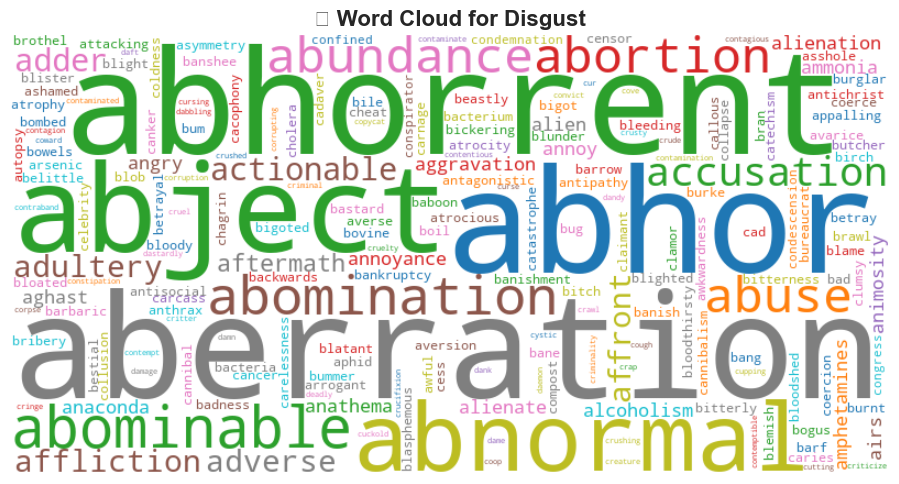

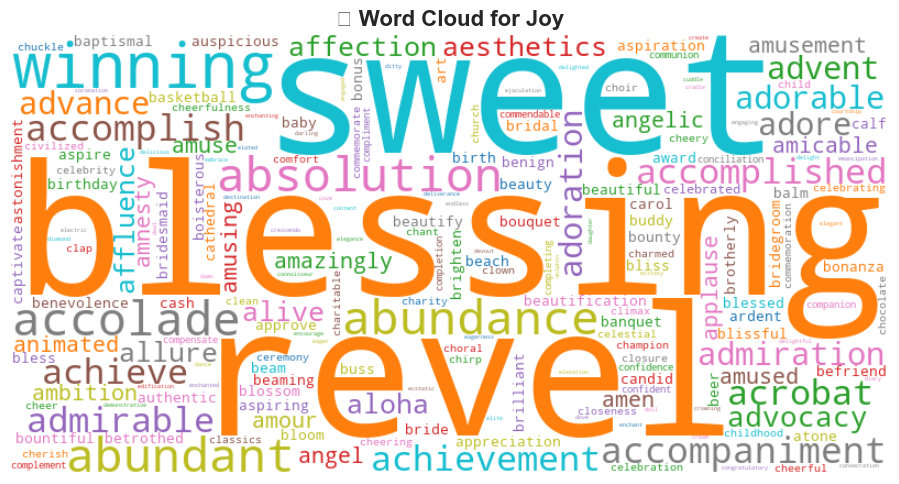

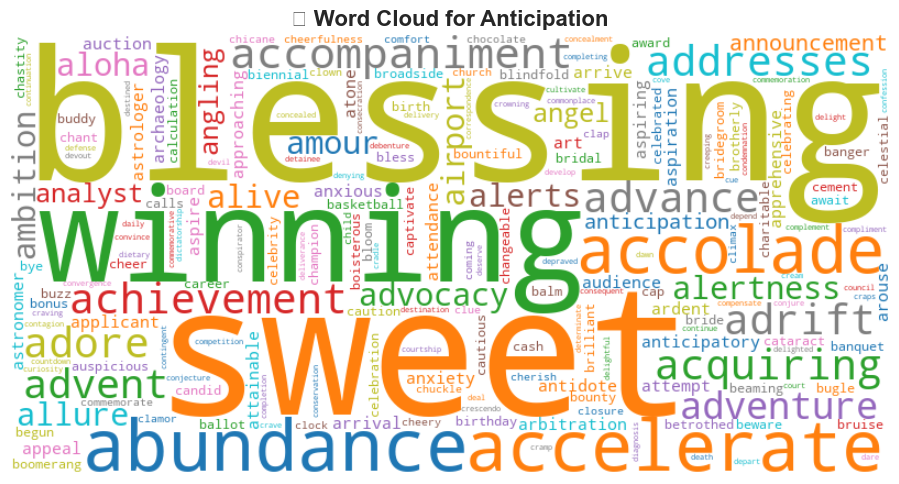

In [16]:
# WordCloud – Emotion Words (grouped)
from collections import defaultdict

emotion_groups = defaultdict(list)

for _, row in df.iterrows():
    emotion_groups[row['emotion']].append(row['word'])

# Generate word clouds for each emotion
for emotion, words in emotion_groups.items():
    text = " ".join(words)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {emotion.title()}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

C:\Users\sarab\AppData\Local\Temp\ipykernel_5856\3655111350.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\sarab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


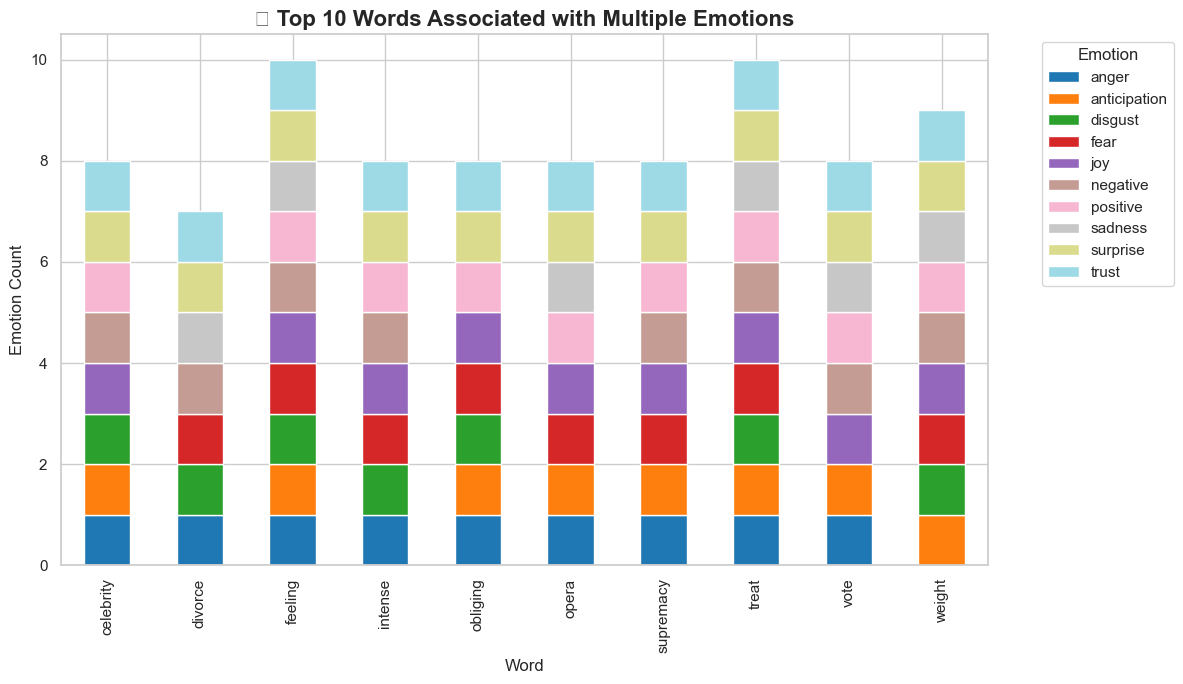

In [17]:
# Stacked Bar – Top 10 Multi-Emotion Words
# Find words associated with multiple emotions
multi_emotion_words = df.groupby('word')['emotion'].count()
multi_emotion_words = multi_emotion_words[multi_emotion_words > 1].sort_values(ascending=False).head(10).index

stacked_data = df[df['word'].isin(multi_emotion_words)]
stacked_pivot = pd.crosstab(stacked_data['word'], stacked_data['emotion'])

stacked_pivot.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title('Top 10 Words Associated with Multiple Emotions', fontsize=16, fontweight='bold')
plt.xlabel('Word')
plt.ylabel('Emotion Count')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()